In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline

In [10]:
#Loading data
file = 'incident_event_log.csv'
inc_event = pd.read_csv(file)
inc_event.shape

(141712, 36)

In [11]:
inc_event.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [12]:
#As shown above it seems that there are multiple duplicates in number colums

In [13]:
inc_event.info()
inc_event.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [14]:
#coverting this data to a panda dataframe for further data wrangling

inc_eventdf = pd.DataFrame(inc_event)
pd.options.display.max_columns = None

In [15]:
#to replace midding vslur dymbol '?' to NaN
inc_eventdf = inc_eventdf.replace(to_replace=['?'],value = [np.nan]) 

In [16]:
# to change all the relevent colums to datetime objects

col_name = ['sys_created_at','opened_at','sys_updated_at','resolved_at','closed_at']
for i in range(len(col_name)):
    inc_eventdf[col_name[i]] = pd.to_datetime(inc_eventdf[col_name[i]], dayfirst = True)

In [17]:
inc_eventdf.loc[inc_eventdf['incident_state'] == '-100', :]


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
115641,INC0028089,-100,True,0,0,1,True,Caller 290,Opened by 305,2016-05-10 22:09:00,Created by 130,2016-05-10 22:09:00,Updated by 750,2016-06-16 12:02:00,Phone,Location 188,Category 28,Subcategory 174,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 64,Resolver 15,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 175,2016-06-16 13:02:00,2016-06-21 13:07:00
115642,INC0028089,-100,True,0,0,2,True,Caller 290,Opened by 305,2016-05-10 22:09:00,Created by 130,2016-05-10 22:09:00,Updated by 750,2016-06-16 12:03:00,Phone,Location 188,Category 28,Subcategory 174,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 64,Resolver 15,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 175,2016-06-16 13:02:00,2016-06-21 13:07:00
124507,INC0030413,-100,True,1,0,14,True,Caller 2950,Opened by 17,2016-05-17 14:42:00,Created by 10,2016-05-17 14:45:00,Updated by 258,2016-06-15 17:15:00,Phone,Location 224,Category 46,Subcategory 150,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 17,Resolver 77,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 70,2016-06-21 17:28:00,2016-06-26 18:00:00
124508,INC0030413,-100,True,1,0,15,True,Caller 2950,Opened by 17,2016-05-17 14:42:00,Created by 10,2016-05-17 14:45:00,Updated by 528,2016-06-15 17:21:00,Phone,Location 224,Category 46,Subcategory 150,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 17,Resolver 77,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 70,2016-06-21 17:28:00,2016-06-26 18:00:00
124509,INC0030413,-100,True,1,0,20,True,Caller 2950,Opened by 17,2016-05-17 14:42:00,Created by 10,2016-05-17 14:45:00,Updated by 258,2016-06-21 17:27:00,Phone,Location 224,Category 46,Subcategory 150,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 17,Resolver 77,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 70,2016-06-21 17:28:00,2016-06-26 18:00:00


In [18]:
#  droped all the rows with incident_state = '-100' as there is only two incidents its effecting
inc_eventdf['incident_state'] =inc_eventdf['incident_state'].replace(to_replace = ['-100'], value = ['Active'])

In [19]:
# After dropping two checking total number of incidents
inc_eventdf.number.nunique()

24918

In [20]:
# filling all the missing value in resolved_at colums with information in sys_updated_at
# sys_updated_at time corresponding to 'Resolved' state in incident_state
# and using ffill to fill the missing value where the incident_state is 'Closed'

m = inc_eventdf.incident_state == 'Resolved'
y = inc_eventdf.resolved_at.isnull()
c =inc_eventdf.incident_state == 'Closed'
inc_eventdf['resolved_at'] = np.where(m & y,inc_eventdf['sys_updated_at'],inc_eventdf['resolved_at'])
inc_eventdf['resolved_at']= np.where(c & y,inc_eventdf['resolved_at'].ffill(axis=0),inc_eventdf['resolved_at'])

In [21]:
# remaining rows with missing resolved_at time
inc_eventdf[inc_eventdf['resolved_at'].isnull()]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
13520,INC0003115,New,True,0,0,0,True,Caller 5134,Opened by 40,2016-03-07 09:04:00,NaN,NaT,Updated by 908,2016-03-07 09:04:00,Phone,Location 143,Category 26,Subcategory 175,Symptom 120,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,NaN,NaT,2016-03-07 17:53:00
23075,INC0005100,New,True,0,0,0,True,Caller 3505,Opened by 337,2016-03-09 18:35:00,Created by 162,2016-03-09 18:35:00,Updated by 703,2016-03-09 18:35:00,Phone,NaN,Category 36,NaN,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,NaN,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 1,NaN,NaT,2016-03-11 14:19:00
51657,INC0011848,Active,True,0,1,1,True,Caller 661,Opened by 24,2016-03-28 10:45:00,NaN,NaT,Updated by 23,2016-03-29 14:07:00,Phone,Location 143,Category 42,Subcategory 223,Symptom 534,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 9,Resolved by 15,NaT,2016-04-03 22:59:00
51658,INC0011848,Active,True,0,1,2,True,Caller 661,Opened by 24,2016-03-28 10:45:00,NaN,NaT,Updated by 23,2016-03-29 14:07:00,Phone,Location 143,Category 42,Subcategory 223,Symptom 534,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 9,Resolved by 15,NaT,2016-04-03 22:59:00
83540,INC0020014,New,True,0,0,0,True,Caller 4036,Opened by 390,2016-04-16 01:46:00,Created by 169,2016-04-16 01:50:00,Updated by 727,2016-04-16 01:50:00,Phone,Location 188,Category 42,Subcategory 174,Symptom 491,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 65,Resolver 25,False,False,Do Not Notify,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2016-04-18 08:59:00
83541,INC0020014,New,True,0,0,2,True,Caller 4036,Opened by 390,2016-04-16 01:46:00,Created by 169,2016-04-16 01:50:00,Updated by 727,2016-04-16 04:39:00,Phone,Location 188,Category 42,Subcategory 174,Symptom 491,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 65,Resolver 25,False,False,Do Not Notify,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2016-04-18 08:59:00
83542,INC0020014,New,True,0,0,3,True,Caller 4036,Opened by 390,2016-04-16 01:46:00,Created by 169,2016-04-16 01:50:00,Updated by 20,2016-04-18 08:38:00,Phone,Location 188,Category 42,Subcategory 174,Symptom 491,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 65,Resolver 25,False,False,Do Not Notify,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2016-04-18 08:59:00
83543,INC0020014,Active,True,0,0,4,True,Caller 4036,Opened by 390,2016-04-16 01:46:00,Created by 169,2016-04-16 01:50:00,Updated by 20,2016-04-18 08:38:00,Phone,Location 188,Category 42,Subcategory 174,Symptom 491,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 65,Resolver 25,False,False,Do Not Notify,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2016-04-18 08:59:00
141670,INC0119241,New,True,0,0,0,True,Caller 1384,Opened by 508,2017-02-13 06:45:00,NaN,NaT,Updated by 908,2017-02-13 06:45:00,IVR,Location 246,Category 50,Subcategory 10,Symptom 533,NaN,3 - Low,2 - Medium,4 - Low,Group 70,NaN,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,NaN,NaT,2017-02-13 06:45:00
141672,INC0119289,New,True,0,0,0,True,Caller 1094,Opened by 508,2017-02-13 08:56:00,NaN,NaT,Updated by 908,2017-02-13 08:56:00,IVR,Location 246,Category 50,Subcategory 10,Symptom 533,NaN,3 - Low,2 - Medium,4 - Low,Group 70,NaN,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,NaN,NaT,2017-02-13 08:56:00


In [22]:
# as there are only few of unique incident number droping the above rows and all the corresponding rows with similar incident number

drop_index = inc_eventdf[inc_eventdf.resolved_at.isnull()].number.value_counts().index
inc_remove = []
for i,j in enumerate(drop_index):
    inc_name = inc_eventdf.loc[inc_event.number == j].index
    inc_remove.extend(inc_name)
    
inc_eventdf = inc_eventdf.drop(inc_eventdf.loc[inc_remove].index) 
inc_eventdf.reset_index(inplace= True)
inc_eventdf.drop(['index'],axis=1,inplace=True)
inc_eventdf.number.nunique()

24904

## how to work with complete logs


In [35]:
# As Closed is the last stage of the ticket filtering the dataset for just the incident_state 'Closed'
# The number of the unique incident is 24918 and this is more than that there is must be more dublicate incidents 
# For the sake of this project we need the last stage of the ticket hence selecting the last duplicate and reindexing for further use


inc_closed = inc_eventdf.loc[inc_eventdf['incident_state'] == 'Closed', :].copy()
inc_closed.drop_duplicates(subset = 'number',keep='last',inplace = True)
inc_closed.reset_index(inplace = True)
inc_closed.drop(['index'], axis=1,inplace = True)
inc_closed

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000047,Closed,False,1,0,8,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 908,2016-03-06 10:00:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00
2,INC0000057,Closed,False,0,0,6,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,NaN,NaT,Updated by 908,2016-03-06 03:00:00,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 6,True,False,Do Not Notify,Problem ID 2,NaN,NaN,NaN,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00
3,INC0000060,Closed,False,0,0,3,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,Created by 81,2016-02-29 06:42:00,Updated by 908,2016-03-07 13:00:00,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 25,Resolver 125,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 3,Resolved by 113,2016-03-02 12:06:00,2016-03-07 13:00:00
4,INC0000062,Closed,False,1,0,7,False,Caller 3765,Opened by 180,2016-02-29 06:58:00,Created by 81,2016-02-29 07:26:00,Updated by 908,2016-03-05 16:00:00,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,NaN,1 - High,2 - Medium,2 - High,Group 23,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 62,2016-02-29 15:51:00,2016-03-05 16:00:00
5,INC0000063,Closed,False,1,0,7,True,Caller 2146,Opened by 180,2016-02-29 07:08:00,Created by 81,2016-02-29 07:17:00,Updated by 908,2016-03-05 17:00:00,Phone,Location 93,Category 20,Subcategory 125,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 23,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 62,2016-02-29 16:01:00,2016-03-05 17:00:00
6,INC0000064,Closed,False,1,0,8,True,Caller 2838,Opened by 131,2016-02-29 07:10:00,Created by 62,2016-02-29 07:14:00,Updated by 908,2016-03-08 17:00:00,Phone,Location 143,Category 53,Subcategory 168,Symptom 580,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 28,Resolver 78,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 71,2016-03-03 16:00:00,2016-03-08 17:00:00
7,INC0000065,Closed,False,6,0,13,True,Caller 5323,Opened by 131,2016-02-29 07:38:00,Created by 62,2016-02-29 07:46:00,Updated by 908,2016-03-07 16:00:00,Phone,Location 108,Category 45,Subcategory 94,Symptom 311,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 33,Resolver 216,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 1,Resolved by 197,2016-03-02 15:21:00,2016-03-07 16:00:00
8,INC0000066,Closed,False,1,0,3,True,Caller 3796,Opened by 24,2016-02-29 08:03:00,Created by 13,2016-02-29 08:18:00,Updated by 908,2016-03-07 15:00:00,Phone,Location 161,Category 55,Subcategory 185,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 54,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 208,2016-03-02 14:37:00,2016-03-07 15:00:00
9,INC0000067,Closed,False,1,0,10,True,Caller 442,Opened by 180,2016-02-29 08:03:00,Created by 81,2016-02-29 08:05:00,Updated by 908,2016-03-07 12:00:00,Phone,Location 143,Category 9,Subcategory 110,Symptom 470,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 28,Resolver 236,True,False,Do Not Noti

In [36]:
# plotting all the boolean category to check the dataset
#created a fuction for creating chart and annotating it with percentage
def bar_perc(x):
    ax = x.value_counts().sort_index().plot(kind='bar',figsize=(20,15),fontsize= 18)
    totals = [] #create a empty list
    for i in ax.patches:             #ax.patches to select each bar as a rectangle
        totals.append(i.get_height()) # .get_height() is used for vertical bar chart use .get_width() for horizontal()
    total = sum(totals) # for geting total no of elements with height as proxy
    for i in ax.patches:
        ax.text(i.get_x()+0.15, i.get_height()+100, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=20,
                color='black')

    

# .get_x() gets the starting x-axis and for y-axis use .get_height



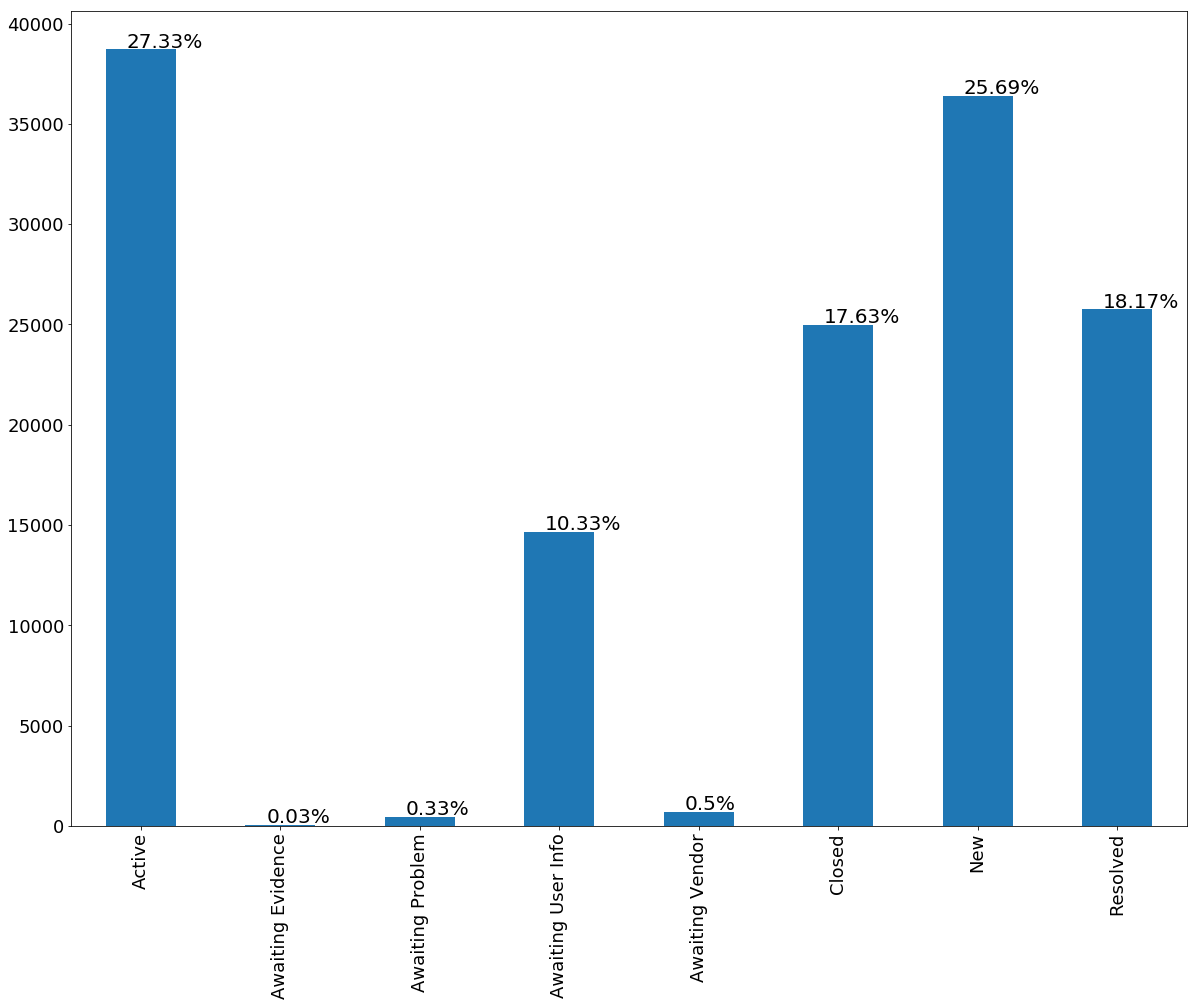

In [37]:
bar_perc(inc_eventdf['incident_state'])

In [38]:
inc_closed = inc_eventdf.loc[inc_eventdf['incident_state'] == 'Closed', :].copy()
inc_closed.drop_duplicates(subset = 'number',keep='last',inplace = True)
inc_closed.reset_index(inplace = True)
inc_closed.drop(['index'], axis=1,inplace = True)
inc_closed

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000047,Closed,False,1,0,8,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 908,2016-03-06 10:00:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00
2,INC0000057,Closed,False,0,0,6,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,NaN,NaT,Updated by 908,2016-03-06 03:00:00,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 6,True,False,Do Not Notify,Problem ID 2,NaN,NaN,NaN,code 10,Resolved by 5,2016-03-01 02:55:00,2016-03-06 03:00:00
3,INC0000060,Closed,False,0,0,3,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,Created by 81,2016-02-29 06:42:00,Updated by 908,2016-03-07 13:00:00,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 25,Resolver 125,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 3,Resolved by 113,2016-03-02 12:06:00,2016-03-07 13:00:00
4,INC0000062,Closed,False,1,0,7,False,Caller 3765,Opened by 180,2016-02-29 06:58:00,Created by 81,2016-02-29 07:26:00,Updated by 908,2016-03-05 16:00:00,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,NaN,1 - High,2 - Medium,2 - High,Group 23,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 62,2016-02-29 15:51:00,2016-03-05 16:00:00
5,INC0000063,Closed,False,1,0,7,True,Caller 2146,Opened by 180,2016-02-29 07:08:00,Created by 81,2016-02-29 07:17:00,Updated by 908,2016-03-05 17:00:00,Phone,Location 93,Category 20,Subcategory 125,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 23,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 7,Resolved by 62,2016-02-29 16:01:00,2016-03-05 17:00:00
6,INC0000064,Closed,False,1,0,8,True,Caller 2838,Opened by 131,2016-02-29 07:10:00,Created by 62,2016-02-29 07:14:00,Updated by 908,2016-03-08 17:00:00,Phone,Location 143,Category 53,Subcategory 168,Symptom 580,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 28,Resolver 78,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 71,2016-03-03 16:00:00,2016-03-08 17:00:00
7,INC0000065,Closed,False,6,0,13,True,Caller 5323,Opened by 131,2016-02-29 07:38:00,Created by 62,2016-02-29 07:46:00,Updated by 908,2016-03-07 16:00:00,Phone,Location 108,Category 45,Subcategory 94,Symptom 311,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 33,Resolver 216,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 1,Resolved by 197,2016-03-02 15:21:00,2016-03-07 16:00:00
8,INC0000066,Closed,False,1,0,3,True,Caller 3796,Opened by 24,2016-02-29 08:03:00,Created by 13,2016-02-29 08:18:00,Updated by 908,2016-03-07 15:00:00,Phone,Location 161,Category 55,Subcategory 185,NaN,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 54,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 208,2016-03-02 14:37:00,2016-03-07 15:00:00
9,INC0000067,Closed,False,1,0,10,True,Caller 442,Opened by 180,2016-02-29 08:03:00,Created by 81,2016-02-29 08:05:00,Updated by 908,2016-03-07 12:00:00,Phone,Location 143,Category 9,Subcategory 110,Symptom 470,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 28,Resolver 236,True,False,Do Not Noti

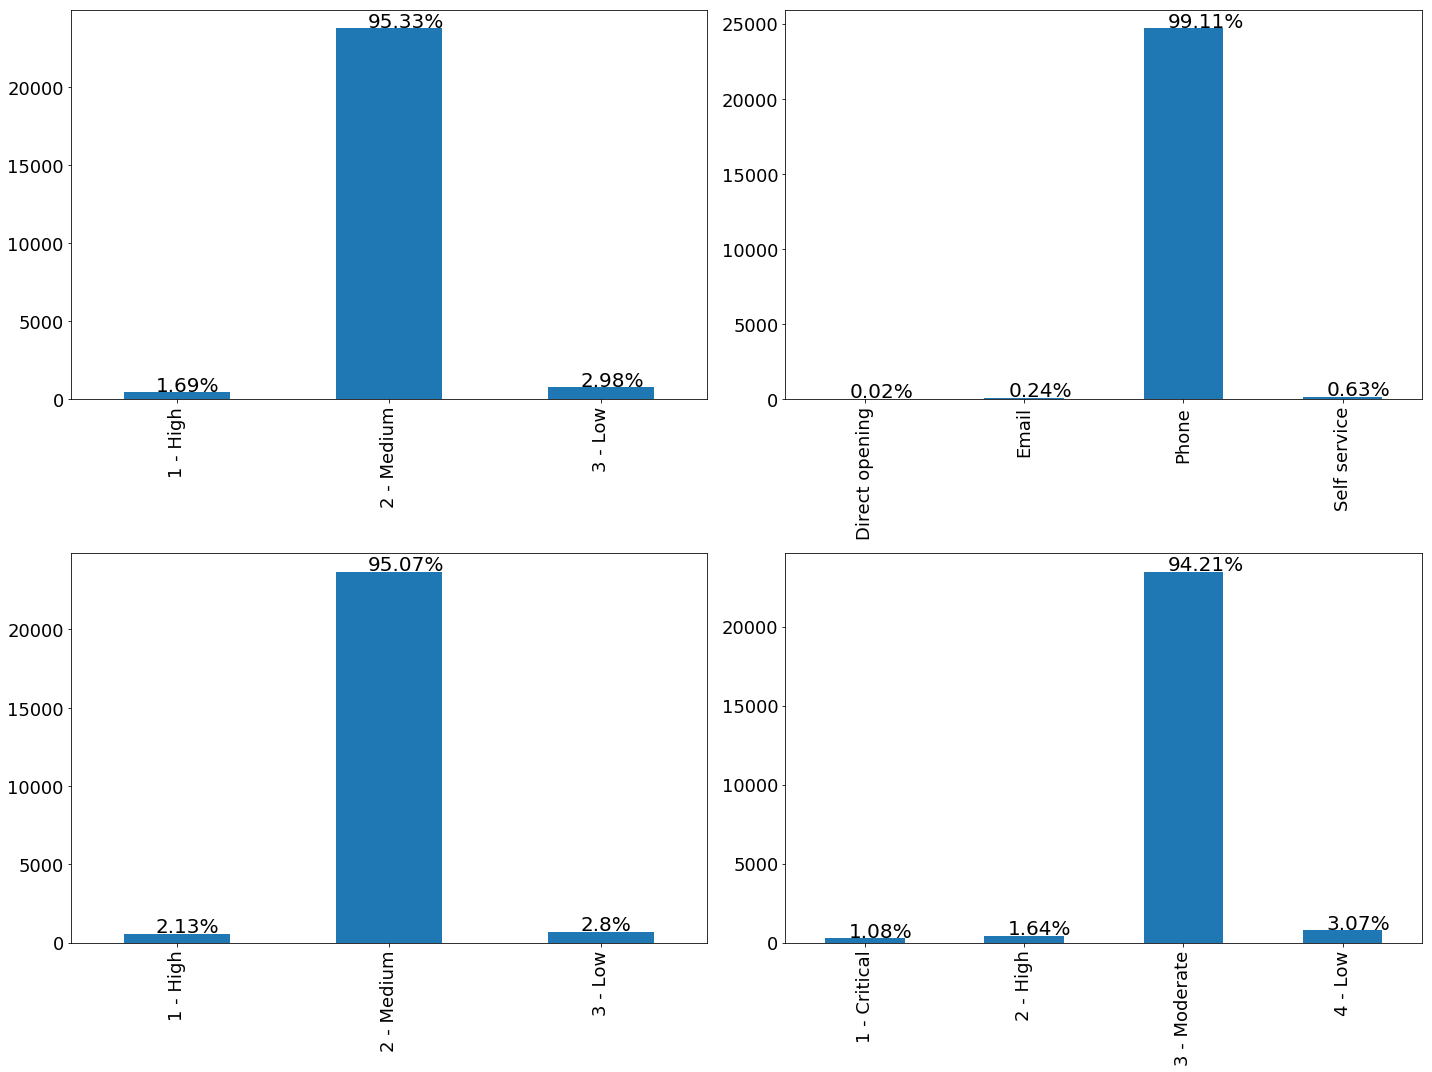

In [39]:
colname = ['impact','contact_type','urgency','priority']

for i,j in enumerate(colname):
    plt.subplot(2,2,i+1)
    bar_perc(inc_closed[j])

plt.tight_layout()

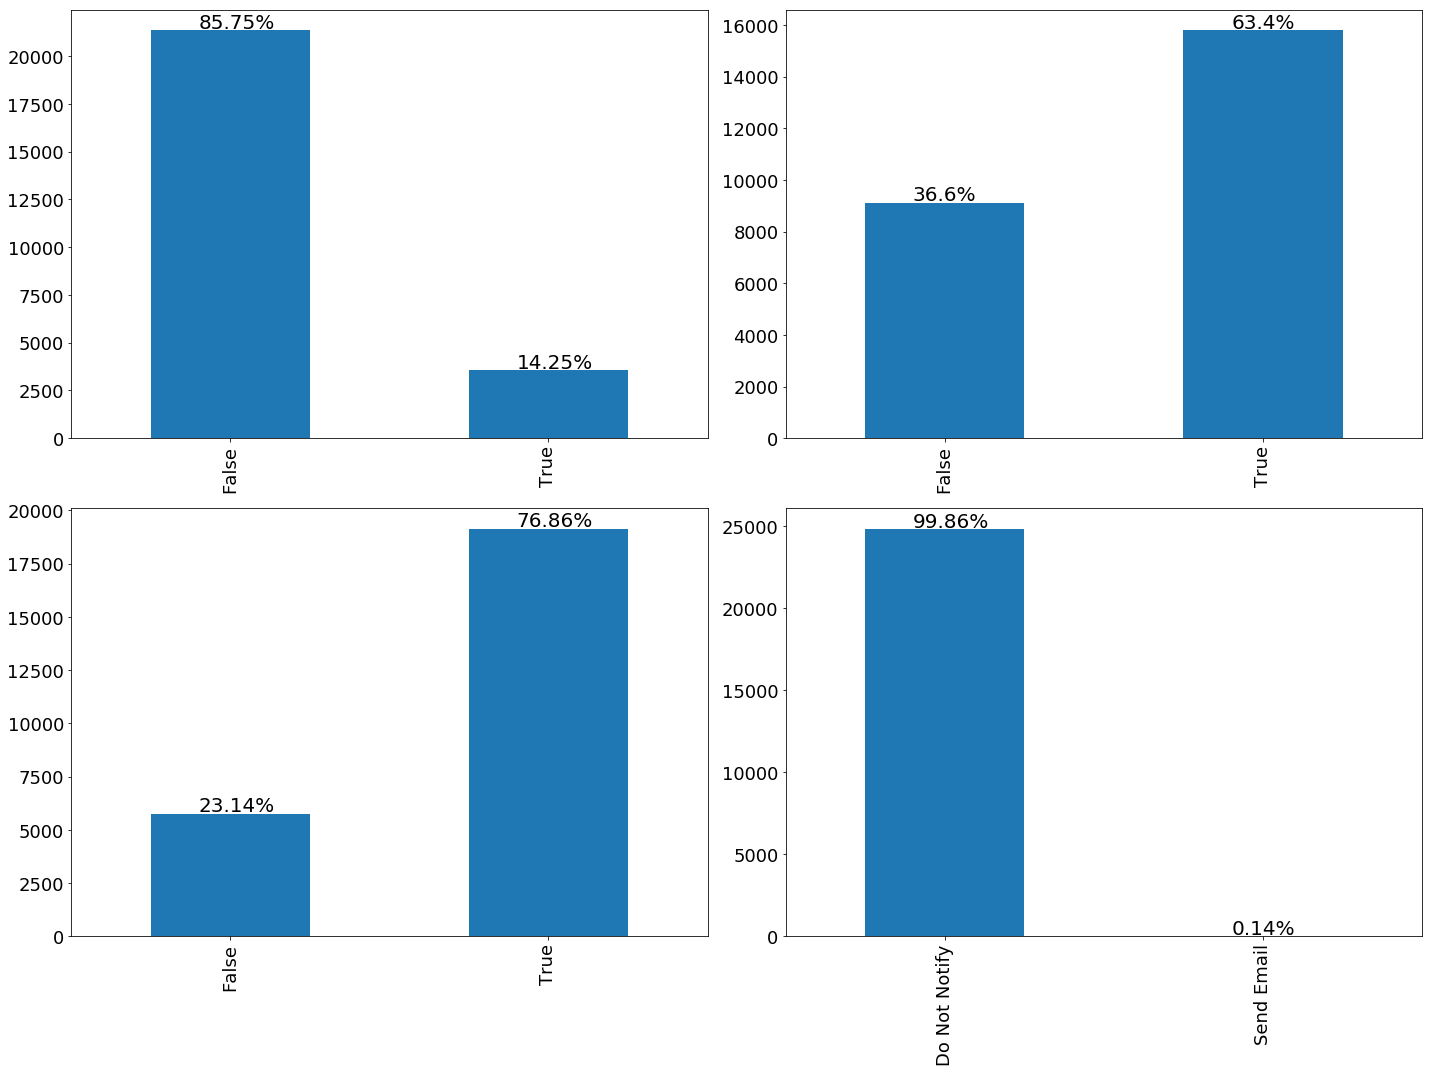

In [40]:
colname = ['knowledge','made_sla','u_priority_confirmation','notify']

for i,j in enumerate(colname):
    plt.subplot(2,2,i+1)
    bar_perc(inc_closed[j])

plt.tight_layout()

### Distribution of number of tickets opened every hour of the day.

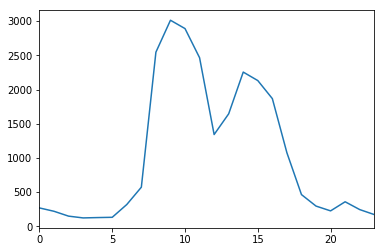

In [41]:
inc_closed['opened_hour']= inc_closed.opened_at.dt.hour
inc_closed.opened_hour.value_counts().sort_index().plot(kind='line')

### Distrbution of ticket volume thorough the week ?

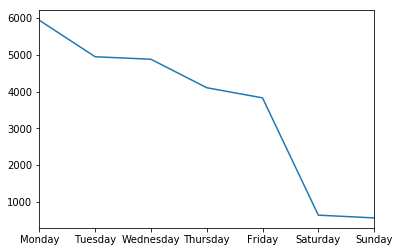

In [42]:
inc_closed['opened_days']= inc_closed.opened_at.dt.weekday_name
inc_closed['opened_days']=pd.Categorical(inc_closed['opened_days'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
inc_closed.opened_days.value_counts().sort_index().plot(kind='line')

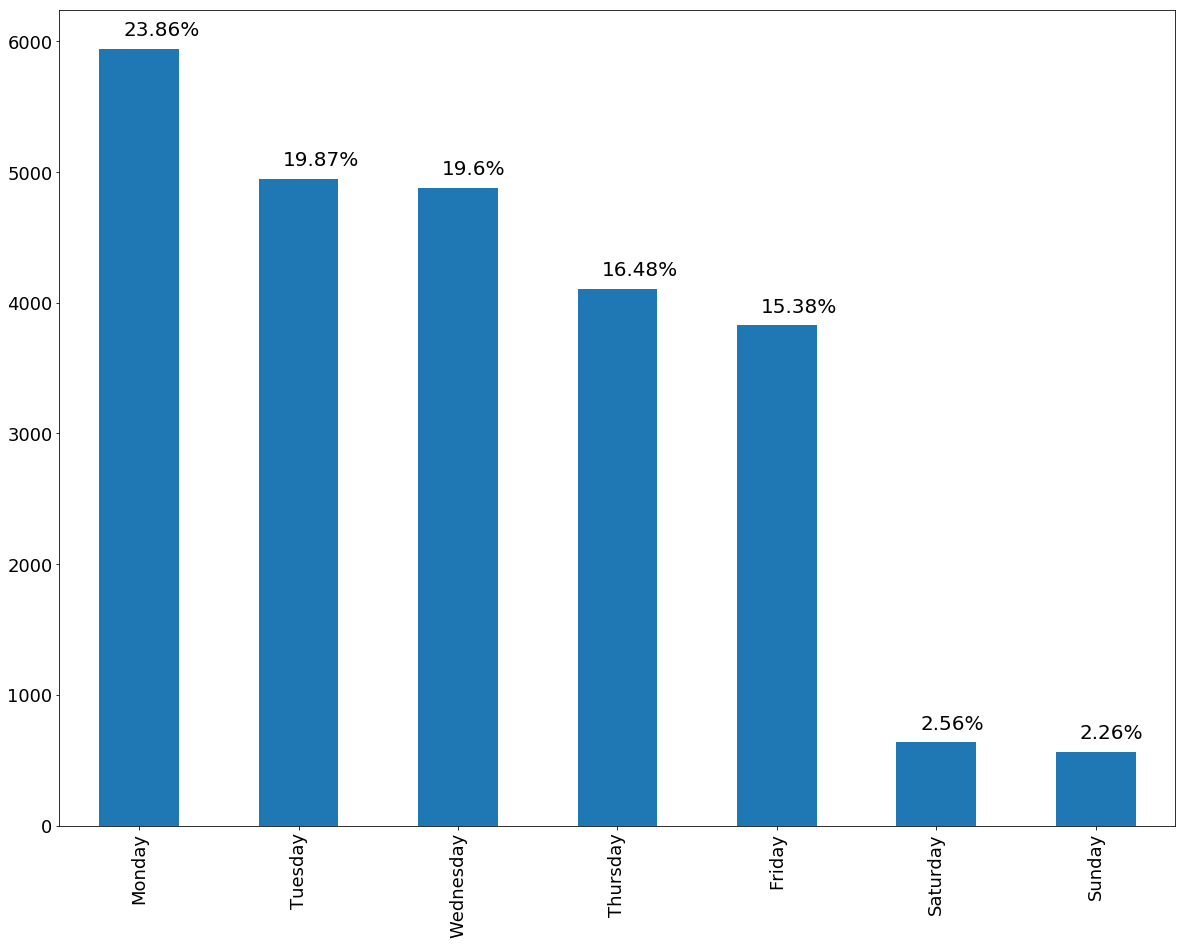

In [43]:
 bar_perc(inc_closed['opened_days'])

### Distribution of the tickets through out the year

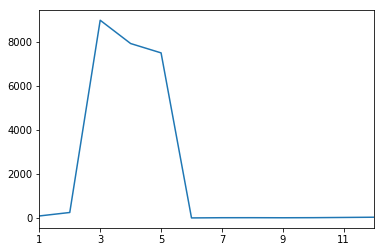

In [44]:
inc_closed['opened_months']= inc_closed.opened_at.dt.month
inc_closed['opened_months']=pd.Categorical(inc_closed['opened_months'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],ordered=True)
inc_closed.opened_months.value_counts().sort_index().plot(kind='line')

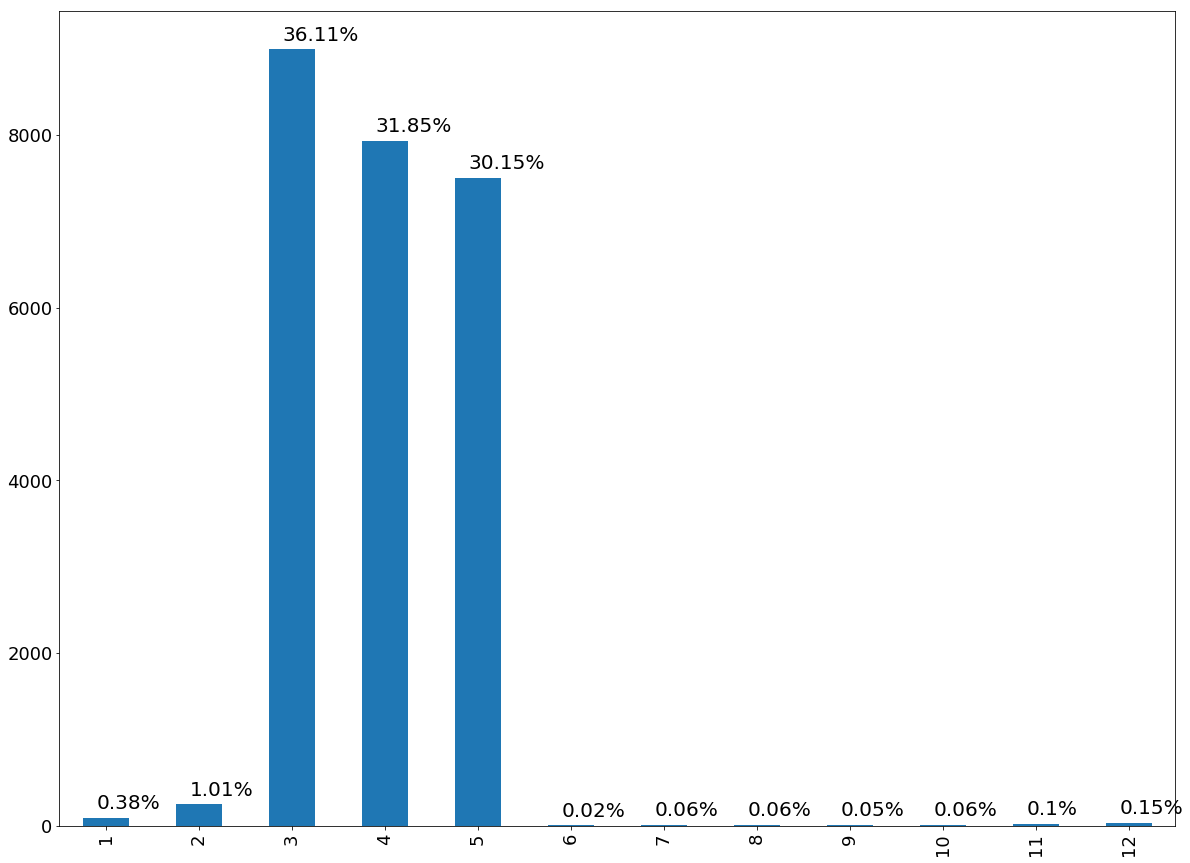

In [45]:
bar_perc(inc_closed['opened_months'])